# Fred aquisition data

In [1]:
import json
import matplotlib.pyplot as plt
import requests

In [2]:
# Load the secret api key
with open('api_cred.json', 'r') as f:
    secrets = json.load(f)

api_key = secrets['api_key'] # you can hardcode your value here if you want
api_key

'f677e7442d9b3235fd762f4cc97772c5'

### Some example without Pandas

In [18]:
seriesID = "UNRATE"   # Unemployment rate
start = "2015-01-01"  # start date
end = "2023-10-31"    # end date
units = "lin"         # Percent change from a year ago

url = "https://api.stlouisfed.org/fred/series/observations" + \
      f"?series_id={seriesID}&api_key={api_key}&file_type=json" + \
      f"&observation_start={start}&observation_end={end}&units={units}"
print(url)
response = requests.get(url)

# print the response
print("response :", response)


https://api.stlouisfed.org/fred/series/observations?series_id=UNRATE&api_key=f677e7442d9b3235fd762f4cc97772c5&file_type=json&observation_start=2015-01-01&observation_end=2023-10-31&units=lin
response : <Response [200]>


Here the response is <Response [200]> which means that the request was successful.
200 is the status code for a successful request.

In [17]:
# print the status code
print("status code :", response.status_code)

# print the content
print("content :", response.content)

status code : 200
content : b'{"realtime_start":"2024-09-10","realtime_end":"2024-09-10","observation_start":"2015-01-01","observation_end":"2023-10-31","units":"pc1","output_type":1,"file_type":"json","order_by":"observation_date","sort_order":"asc","count":106,"offset":0,"limit":100000,"observations":[{"realtime_start":"2024-09-10","realtime_end":"2024-09-10","date":"2015-01-01","value":"-13.63636"},{"realtime_start":"2024-09-10","realtime_end":"2024-09-10","date":"2015-02-01","value":"-17.91045"},{"realtime_start":"2024-09-10","realtime_end":"2024-09-10","date":"2015-03-01","value":"-19.40299"},{"realtime_start":"2024-09-10","realtime_end":"2024-09-10","date":"2015-04-01","value":"-12.90323"},{"realtime_start":"2024-09-10","realtime_end":"2024-09-10","date":"2015-05-01","value":"-11.11111"},{"realtime_start":"2024-09-10","realtime_end":"2024-09-10","date":"2015-06-01","value":"-13.11475"},{"realtime_start":"2024-09-10","realtime_end":"2024-09-10","date":"2015-07-01","value":"-16.129

Here the content is in byte format. 
We can decode it to utf-8 format.
But, as the reposnse is in json format, 
we can directly decode it to json format using the json() method from requests library

In [5]:
# print the json content
print("json content :", response.json())

json content : {'realtime_start': '2024-09-10', 'realtime_end': '2024-09-10', 'observation_start': '2015-01-01', 'observation_end': '2023-10-31', 'units': 'pc1', 'output_type': 1, 'file_type': 'json', 'order_by': 'observation_date', 'sort_order': 'asc', 'count': 106, 'offset': 0, 'limit': 100000, 'observations': [{'realtime_start': '2024-09-10', 'realtime_end': '2024-09-10', 'date': '2015-01-01', 'value': '-13.63636'}, {'realtime_start': '2024-09-10', 'realtime_end': '2024-09-10', 'date': '2015-02-01', 'value': '-17.91045'}, {'realtime_start': '2024-09-10', 'realtime_end': '2024-09-10', 'date': '2015-03-01', 'value': '-19.40299'}, {'realtime_start': '2024-09-10', 'realtime_end': '2024-09-10', 'date': '2015-04-01', 'value': '-12.90323'}, {'realtime_start': '2024-09-10', 'realtime_end': '2024-09-10', 'date': '2015-05-01', 'value': '-11.11111'}, {'realtime_start': '2024-09-10', 'realtime_end': '2024-09-10', 'date': '2015-06-01', 'value': '-13.11475'}, {'realtime_start': '2024-09-10', 'rea

The json response contains some keys like:
  - realtime_start
  - realtime_end
  - units
  ...
  - observations

The observations key contains the data we need.
The observation key contains a list of dictionaries. where two keys are interesting for us:
  - date, the date of the observation
  - value, the value of the observation

In [6]:
print((response.json()["observations"][0]))

{'realtime_start': '2024-09-10', 'realtime_end': '2024-09-10', 'date': '2015-01-01', 'value': '-13.63636'}


In [7]:
# TODO: Given the response in json format, extract a list made of tuples where the first element is the date as str type and the second element is the value as float type
# Hint: use list comprehension
# FRED API Observations DOC : https://fred.stlouisfed.org/docs/api/fred/series_observations.html
data: list[tuple[str, float]] = [(observation["date"], float(observation["value"])) for observation in response.json()["observations"]]
print("data :", (data))

data : [('2015-01-01', -13.63636), ('2015-02-01', -17.91045), ('2015-03-01', -19.40299), ('2015-04-01', -12.90323), ('2015-05-01', -11.11111), ('2015-06-01', -13.11475), ('2015-07-01', -16.12903), ('2015-08-01', -16.39344), ('2015-09-01', -15.25424), ('2015-10-01', -12.2807), ('2015-11-01', -12.06897), ('2015-12-01', -10.71429), ('2016-01-01', -15.78947), ('2016-02-01', -10.90909), ('2016-03-01', -7.40741), ('2016-04-01', -5.55556), ('2016-05-01', -14.28571), ('2016-06-01', -7.54717), ('2016-07-01', -7.69231), ('2016-08-01', -3.92157), ('2016-09-01', 0.0), ('2016-10-01', -2.0), ('2016-11-01', -7.84314), ('2016-12-01', -6.0), ('2017-01-01', -2.08333), ('2017-02-01', -6.12245), ('2017-03-01', -12.0), ('2017-04-01', -13.72549), ('2017-05-01', -8.33333), ('2017-06-01', -12.2449), ('2017-07-01', -10.41667), ('2017-08-01', -10.20408), ('2017-09-01', -14.0), ('2017-10-01', -14.28571), ('2017-11-01', -10.6383), ('2017-12-01', -12.76596), ('2018-01-01', -14.89362), ('2018-02-01', -10.86957), ('

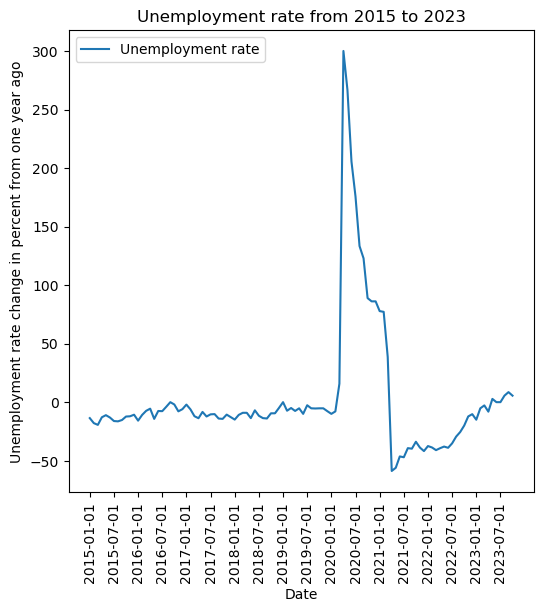

In [8]:
# Plotting the data
# TODO: plot the data, you need to create the same plot as the one following
date: list[str] = [observation[0] for observation in data]
value: list[float] = [observation[1] for observation in data]

plt.figure(figsize=(6, 6))

plt.plot(date, value, label="Unemployment rate")

plt.title("Unemployment rate from 2015 to 2023")
plt.xlabel("Date")
plt.ylabel("Unemployment rate change in percent from one year ago")
plt.xticks(date[::6], rotation=90)
plt.legend()
plt.savefig("unemployment_rate_2015_2023.png")

plt.show()

<function matplotlib.pyplot.figure(num: 'int | str | Figure | SubFigure | None' = None, figsize: 'tuple[float, float] | None' = None, dpi: 'float | None' = None, *, facecolor: 'ColorType | None' = None, edgecolor: 'ColorType | None' = None, frameon: 'bool' = True, FigureClass: 'type[Figure]' = <class 'matplotlib.figure.Figure'>, clear: 'bool' = False, **kwargs) -> 'Figure'>

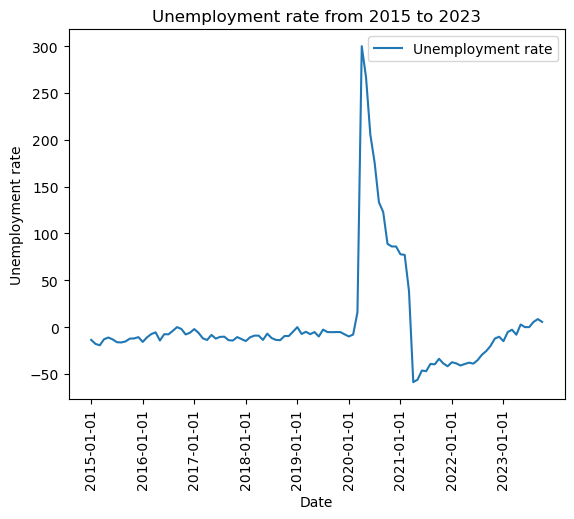

In [9]:
from example_plot import example_plot
x = [x[0] for x in data]
y = [y[1] for y in data]
example_plot(x, y, u"Unemployment rate")
# I changed the plt.xticks to display only one date per year and changed the reotation to 90degree

# Part 2: two plots
In this part you are required to make one chart with two plots, one for the `GDP` and one for the `UNRATE`.

This tie you are asked to make the API calls by yourself (you can inspire yourself from the previous part). You can keep the same start and end date, but the seriesID should be different (`GDP` and `UNRATE` respectivelly). The units also differs:
- for `GDP` the units would be `pc1`
- for `UNRATE` the units would be `lin`

Once you have the data you should plot the inside the same chart. You'll use the same values for `X` and the `Y` values will differs for the two plots.

In [10]:
seriesID = "GDP"
units = "pc1"
url = "https://api.stlouisfed.org/fred/series/observations" + \
      f"?series_id={seriesID}&api_key={api_key}&file_type=json" + \
      f"&observation_start={start}&observation_end={end}&units={units}"

gdp_pc1 = requests.get(url)

In [11]:
seriesID = "UNRATE"
units = "lin"
url = "https://api.stlouisfed.org/fred/series/observations" + \
      f"?series_id={seriesID}&api_key={api_key}&file_type=json" + \
      f"&observation_start={start}&observation_end={end}&units={units}"

unrate_lin = requests.get(url)

In [12]:
gdp_pc1_data = [(o["date"], float(o["value"])) for o in gdp_pc1.json()["observations"]]
unrate_lin_data = [(o["date"], float(o["value"])) for o in unrate_lin.json()["observations"]]

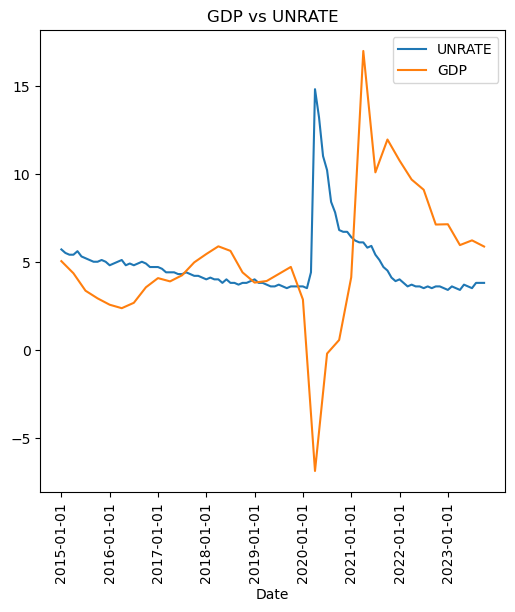

In [33]:
date_gdp: list[str] = [observation[0] for observation in gdp_pc1_data]
value_gdp: list[float] = [observation[1] for observation in gdp_pc1_data]

date_unrate: list[str] = [observation[0] for observation in unrate_lin_data]
value_unrate: list[float] = [observation[1] for observation in unrate_lin_data]

plt.figure(figsize=(6, 6))

plt.plot(date_unrate, value_unrate, label="UNRATE")
plt.plot(date_gdp, value_gdp, label="GDP")

plt.title("GDP vs UNRATE")
plt.xlabel("Date")
# plt.ylabel("Unemployment rate change in percent from one year ago")
plt.xticks(date_unrate[::12], rotation=90)
plt.legend()
# plt.savefig("unemployment_rate_2015_2023.png")

plt.show()

In [22]:
def add(a

In [23]:
print(add(2,3))

6
